In [1]:
## Read table, combine table, parse the time string, save to pkl
## Visualize the excursion event
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime
import matplotlib.dates as mdates
import numpy as np
from scipy import signal
from scipy.fftpack import fft, ifft
import time
from anomaly_detection import anomaly_detection
pd.set_option('display.max_columns', 51)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 32}
plt.rc('font', **font)
import os 
dir_path = os.getcwd()
data_dir = os.path.abspath(os.path.join(dir_path, '../data'))
print (data_dir)
combined_pkl = os.path.join(data_dir, "combine.pkl")
combined_pkg_tbl = os.path.join(data_dir, 'combine_table.pkl')
part1_pkl = os.path.join(data_dir, "Part1.pkl")
part2_pkl = os.path.join(data_dir, "Part2.pkl")
%matplotlib inline

Using TensorFlow backend.


/home/aind2/workspace/unu_bhp_2018/data


In [2]:
file_df = pd.read_pickle(combined_pkl)

file_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469681 entries, 0 to 469680
Data columns (total 89 columns):
hackathon4_x                                                               469681 non-null object
TimeStamp                                                                  469681 non-null datetime64[ns]
05-PT-28201-01_B2_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-28201-03_B2_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-29101-02_C1_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-29101-03_C1_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-33101-02_G1_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-33101-03_G1_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-34101-01_H1_Manifold_Pressure (Psi)                                  469681 non-null 

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Train on 1853 samples, validate on 926 samples
Epoch 1/60
Epoch 00000: val_loss improved from inf to 0.03405, saving model to /home/aind2/workspace/unu_bhp_2018/data/weights.hdf5
10s - loss: 0.0100 - val_loss: 0.0341
Epoch 2/60
Epoch 00001: val_loss did not improve
6s - loss: 0.0037 - val_loss: 0.0399
Epoch 3/60
Epoch 00002: val_loss did not improve
6s - loss: 0.0040 - val_loss: 0.0357
Epoch 4/60
Epoch 00003: val_loss improved from 0.03405 to 0.02640, saving model to /home/aind2/workspace/unu_bhp_2018/data/weights.hdf5
6s - loss: 0.0041 - val_loss: 0.0264
Epoch 5/60
Epoch 00004: val_loss improved from 0.02640 to 0.01975, saving model to /home/aind2/workspace/unu_bhp_2018/data/weights.hdf5
6s - loss: 0.0035 - val_loss: 0.0197
Epoch 6/60
Epoch 00005: val_loss improved from 0.01975 to 0.01537, saving model to /home/aind2/workspace/unu_bhp_2018/data/weights.hdf5
6s - loss: 0.0032 - val_loss: 0.0154
Epoch 7/60
Epoch 00006: val_loss improved from 0.01537 to 0.01305, saving model to /home/ain

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


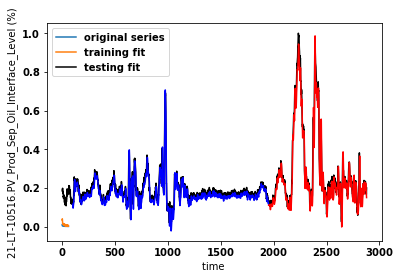

In [3]:
with anomaly_detection(sequence_length=100, batch_size=128, epochs=60, dropout=0.6) as anomaly_detection:
    start = time.time()
    start_time = datetime(2016, 11, 15,10,0)
    end_time = datetime(2016, 11, 16, 10,0)
    time_range= (file_df["TimeStamp"] < end_time) & (file_df["TimeStamp"] > start_time)
    time_series = file_df[time_range]["21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)"]
    anomaly_detection.process_timeseries(time_series, show_figures=True)
